In [55]:
import sys
import os

current_dir = os.getcwd()  # dir corrente
root_path = os.path.abspath(os.path.join(current_dir, '..')) # path per dir principale
sys.path.append(root_path)

from imports import *


In [56]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [57]:
df_train = pd.read_csv(f"{path_dataframes}/df_train_complete.csv")
df_test = pd.read_csv(f"{path_dataframes}/df_test_complete.csv")

df_labels = pd.read_csv(f"{path_dataframes}/df_labels_train.csv")

In [58]:
df_labels

,index,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [59]:
column_to_number = {
    'SV1': 1,
    'SV2': 2,
    'SV3': 3,
    'SV4': 4,
}

df_labels['fault_sv'] = 0
df_labels['opening_ratio'] = 100


for index, row in df_labels.iterrows():
    for col in column_to_number.keys():
        if row[col] < 100:
            val=row[col]
            df_labels.at[index, 'fault_sv'] = column_to_number[col]
            df_labels.at[index,'opening_ratio'] = [val]
            break



In [60]:
df_labels["fault_sv"].tail(50)

127    2
128    2
129    3
130    3
131    3
132    3
133    4
134    4
135    4
136    4
137    1
138    1
139    1
140    1
141    2
142    2
143    2
144    2
145    3
146    3
147    3
148    3
149    4
150    4
151    4
152    4
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
Name: fault_sv, dtype: int64

In [61]:
df_train

,index,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
0,0,0.860683,0.947263,0.892643,0.289725,0.646085,0.396821,0.943984,0.461597,0.387633,...,0.553568,0.647181,0.650140,0.472297,0.597727,0.8,0.472297,0.725271,0.558522,0.813644
1,1,0.852472,0.881227,0.890624,0.293799,0.640009,0.356142,0.868280,0.455896,0.385014,...,0.587760,0.688050,0.693058,0.507478,0.644958,0.8,0.507478,0.767706,0.577813,0.900166
2,2,0.843624,0.878493,0.886027,0.298811,0.632649,0.394658,0.893893,0.451143,0.380942,...,0.698368,0.602476,0.611104,0.626842,0.558590,1.0,0.626842,0.863177,0.414686,0.615641
3,3,0.848008,0.850933,0.881030,0.300970,0.626942,0.429939,0.912911,0.449168,0.377372,...,0.491161,0.600616,0.601133,0.410084,0.545026,0.8,0.410084,0.643043,0.554054,0.221298
4,4,0.845165,0.867672,0.879113,0.303136,0.623305,0.428040,0.911366,0.446502,0.375677,...,0.511471,0.598389,0.599534,0.430053,0.544344,0.8,0.430053,0.660353,0.537570,0.432612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,0.845774,0.170685,0.782153,0.000000,0.738090,0.390637,0.514795,0.819289,0.470502,...,0.587213,1.000000,1.000000,0.506908,1.000000,0.4,0.506908,0.715115,0.923026,0.695507
173,173,0.927244,0.396663,0.817638,0.328347,0.848741,0.791386,0.165169,0.546360,0.919978,...,1.000000,0.713938,0.733629,1.000000,0.686769,0.6,1.000000,0.848233,0.320495,0.995008
174,174,0.945257,0.509101,0.360605,0.602150,0.214549,0.584715,0.454008,0.141901,0.609891,...,0.490124,0.310141,0.314049,0.409072,0.260226,0.4,0.409072,0.043048,0.260117,0.136439
175,175,0.811979,0.390568,0.309811,1.000000,0.251210,0.693178,0.601747,0.000000,0.798344,...,0.301713,0.000000,0.000000,0.236099,0.000000,0.0,0.236099,0.000000,0.073649,0.452579


In [62]:
df_labels

,index,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition,fault_sv,opening_ratio
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
1,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
2,2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
3,3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
4,4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1,0,100
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1,0,100
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1,0,100
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1,0,100


In [63]:
def feature_selection_anova(df_X,df_y,n_features):
    X = df_X
    y = df_y
    
    f_values, p_values = f_classif(X, y)

    results = pd.DataFrame({'Feature': X.columns, 'F_Value': f_values, 'P_Value': p_values})

    results = results.sort_values(by='F_Value', ascending=False)

    top_features = results.head(n_features)
    features = top_features["Feature"].values
    # features=np.concatenate([features, ["binary_condition"]])

    plt.figure(figsize=(10, 8))
    plt.barh(top_features["Feature"], top_features["F_Value"], color='skyblue')
    plt.xlabel('F-Value')
    plt.ylabel('Feature')
    plt.title('Top Features - ANOVA F-Value')
    plt.gca().invert_yaxis() 
    plt.show()
    return features

In [64]:
def feature_selection_chi2(df_X, df_y, n_features):
    X = df_X
    y = df_y

    chi2_selector = SelectKBest(chi2, k=n_features)
    chi2_selector.fit(X, y)

    scores = chi2_selector.scores_
    selected_features = chi2_selector.get_support(indices=True)
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    
    top_features = feature_scores.head(n_features)
    features = top_features["Feature"].values
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Score', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Chi-Square Scores')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.show()

    return features


In [65]:
def feature_selection_random_forest(df_X, df_y, n_features):
    X = df_X
    y = df_y

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X, y)

    importances = rf_model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    top_features = feature_importances.head(n_features)
    features = top_features["Feature"].values

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Random Forest Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

    return features

In [66]:
df_train=df_train.drop(columns="index")

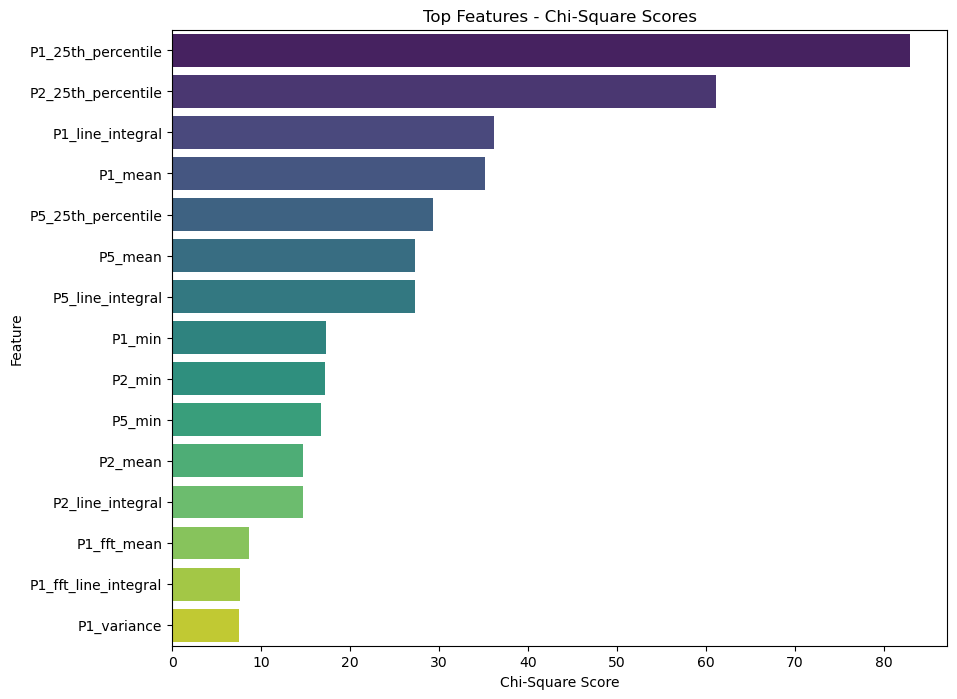

In [67]:
features_chi2 = feature_selection_chi2(df_train,df_labels["opening_ratio"],15)


In [68]:
df_labels

,index,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition,fault_sv,opening_ratio
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
1,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
2,2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
3,3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
4,4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1,0,100
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1,0,100
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1,0,100
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1,0,100


In [69]:
df_train = df_train[features_chi2]
df_test = df_test[features_chi2]
df_train = df_train[105:]
df_labels = df_labels[105:]

In [70]:
from scipy.stats import pearsonr

In [79]:
plt.figure(figsize=(14,8))
correlations = []
for column in df_train.columns:
    corr, p_value = pearsonr(df_labels['opening_ratio'], df_train[column])
    correlations.append((column, corr, p_value))

correlation_df = pd.DataFrame(correlations, columns=['Column', 'Correlation', 'P-value'])

print(correlation_df)

correlation_matrix = df_train.corrwith(df_labels['opening_ratio']).to_frame().T
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()


                  Column  Correlation       P-value
0     P1_25th_percentile    -0.656131  3.937861e-10
1     P2_25th_percentile    -0.648763  7.150777e-10
2       P1_line_integral    -0.727897  4.358593e-13
3                P1_mean    -0.729995  3.459250e-13
4     P5_25th_percentile    -0.584239  7.137571e-08
5                P5_mean    -0.707288  3.789301e-12
6       P5_line_integral    -0.704172  5.170917e-12
7                 P1_min    -0.227407  5.471972e-02
8                 P2_min     0.000073  9.995159e-01
9                 P5_min    -0.029142  8.080068e-01
10               P2_mean    -0.634249  2.211312e-09
11      P2_line_integral    -0.631837  2.652638e-09
12           P1_fft_mean     0.729995  3.459250e-13
13  P1_fft_line_integral     0.747554  4.576259e-14
14           P1_variance     0.476991  2.274241e-05


<Figure size 1400x800 with 0 Axes>

In [72]:
# df_train["sv"] = df_labels["fault_sv"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels["opening_ratio"], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 17.7328125


In [74]:
print(y_pred)
print(y_test)

[ -3.3984375 113.0078125  56.6953125  -4.1953125  11.5546875  74.015625
  49.1171875  51.625       6.125     118.359375   40.9375     64.1328125
  64.4296875  76.578125   63.2265625]
109      0
167    100
123     50
105      0
133      0
155    100
115     50
139     50
117      0
159    100
152     75
136     75
114     25
150     25
110     25
Name: opening_ratio, dtype: int64


In [75]:
df_test

,P1_25th_percentile,P2_25th_percentile,P1_line_integral,P1_mean,P5_25th_percentile,P5_mean,P5_line_integral,P1_min,P2_min,P5_min,P2_mean,P2_line_integral,P1_fft_mean,P1_fft_line_integral,P1_variance
0,0.188521,0.039488,0.079321,0.082119,0.251141,0.054306,0.055201,0.371555,0.892153,0.048438,0.217085,0.218569,0.917881,0.724093,0.886305
1,0.063933,0.046077,0.143726,0.147686,0.174802,0.131273,0.130994,0.182168,0.007976,0.003761,0.351010,0.351138,0.852314,0.702469,0.960428
2,0.065567,0.056646,0.148848,0.152884,0.176327,0.069689,0.069548,0.152192,0.014128,0.002697,0.176846,0.176715,0.847116,0.708435,0.996205
3,0.061874,0.042924,0.152639,0.156664,0.169909,0.186267,0.186084,0.162786,0.014086,0.018448,0.179134,0.178976,0.843336,0.701325,0.995939
4,0.065674,0.056385,0.146502,0.150548,0.179430,0.071635,0.071468,0.152803,0.014132,0.002987,0.182343,0.182215,0.849452,0.712752,0.995672
5,0.064793,0.058526,0.138308,0.142371,0.176327,0.077192,0.077004,0.152057,0.014342,0.003052,0.178993,0.178901,0.857629,0.723098,0.995498
6,25.221792,17.693374,128.022406,127.576711,15.878233,86.581226,86.454785,1.861598,1.726244,1.884693,67.423459,67.370615,1.977548,1.755370,1.254651
7,0.068747,0.059840,0.137160,0.141229,0.179970,0.102284,0.102089,0.152060,0.014342,0.002945,0.175558,0.175463,0.858771,0.723608,0.996397
8,0.032575,0.162470,0.052874,0.052536,0.200950,0.150024,0.156484,0.307737,0.036904,0.592579,0.209556,0.213790,0.947464,0.826711,0.626103
9,0.065113,0.053632,0.141022,0.145077,0.179866,0.134792,0.134594,0.152046,0.014222,0.002757,0.181291,0.181163,0.854923,0.716925,0.996878


In [76]:
pred=model.predict(df_test)

In [77]:
pred=pred.astype(str)

In [78]:
pred[[0,2,3,4,8,7]]

array(['99.9921875', '56.734375', '42.9453125', '65.1328125', '97.703125',
       '59.28125'], dtype='<U32')